# ROI and Arethmatic Lab

In this lab we need to generate this output

![Image](Files/21_output.png)

## Criteria
- Logo width must be 150px.
- Ratio must be reserved.
- Must be 10px away from right and bottom sides.

In [33]:
import cv2
print(cv2.__version__)
from matplotlib import pyplot as plt
import numpy as np

4.5.1


(287, 1780, 3)


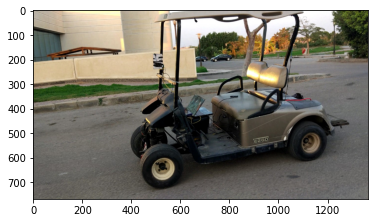

In [34]:
img = cv2.imread("./carkyo.jpg")
logo = cv2.imread("./tekomoro.png")
plt.imshow(img[:,:,::-1]);
print(logo.shape)


In [35]:
ratio=round(1780/150)
logo_copy = cv2.resize(logo,(150,round(287/ratio)))# ((W X H))
H=logo_copy.shape[0]
W=logo_copy.shape[1]


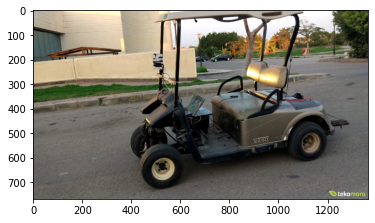

In [36]:
gray=cv2.cvtColor(logo_copy, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)#THRESH_BINARY_INV
mask_inv = cv2.bitwise_not(mask)
new_img = cv2.bitwise_and(img[-10-H:-10,-10-W:-10],img[-10-H:-10,-10-W:-10],mask=mask_inv)#2 sources revice it
img[-10-H:-10,-10-W:-10]=new_img
new_logo = cv2.bitwise_and(logo_copy,logo_copy,mask=mask)
final = cv2.add(new_logo,img[-10-H:-10,-10-W:-10])
img[-10-H:-10,-10-W:-10] = final
plt.imshow(img[:,:,::-1]);

In [38]:
plt.imsave("outimage.jpg",img[:,:,::-1])